Contexte et Informations sur les données:

Pour ce qui concerne ce project, il s'agit de la prédiction de churn
partant des données disponibles des clients. Pour connaitre le taux de churn il suffit
de faire le rapport entre le nombre de clients présents à la fin d’une période x sur le
nombre total de clients présents au début de la même période x. Cet indicateur se
calcule donc à postori, c’est-à-dire après que les clients soient partis. Cependant il
existe d’autres mesures sur lesquelles basées l’analyse pour la prédiction du churn.

Descriptions des attributs:

Chaque ligne représente un client, chaque colonne contient les attributs du client décrits dans la colonne Métadonnées. Les données brutes contiennent 7043 lignes (clients) et 21 colonnes (fonctionnalités). La colonne «Churn» est notre objectif.

"Prédire le comportement pour fidéliser les clients. Vous pouvez analyser toutes les données client pertinentes et développer des programmes de fidélisation clients ciblés." [Ensembles de données d'exemple IBM]

Clients qui sont partis au cours du dernier mois - la colonne s'appelle Churn. Services auxquels chaque client s'est abonné - téléphone, lignes multiples, Internet, sécurité en ligne, sauvegarde en ligne, protection de l'appareil, assistance technique et diffusion de programmes télévisés et de films

Informations sur le compte client: depuis combien de temps il est client, contrat, mode de paiement, facturation sans papier, frais mensuels et total des frais

Informations démographiques sur les clients - sexe, tranche d'âge et s'ils ont des partenaires et des personnes à charge

Pour la réalisation de ce cas pratique, nous nous sommes basés sur les
attributs que l’on peut prélever sur l’activité des clients au sein de l’institution
bancaire afin qu’à partir de ces attributs l’on arrive à prédire le départ des clients,
ces attributs sont : RowNumber, CustomerId, Surname, CreditScore, Geography,
Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember,
EstimatedSalary, Exited.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
dataset = pd.read_csv('utiliser_card.csv')
dataset = dataset.dropna(axis=0)

In [3]:
dataset = dataset.dropna(axis=0)
X = dataset.iloc[:,[2,7]].values
dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


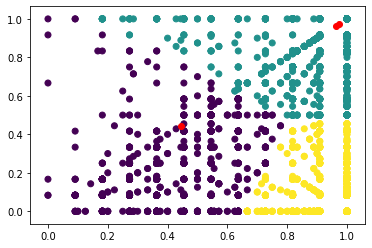

In [4]:
model = kmeans = KMeans(n_clusters = 3 , init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],  model.cluster_centers_[:,0], c='r')

In [5]:
inertia =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

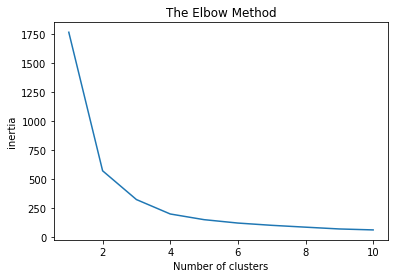

In [6]:
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [7]:
kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(X)

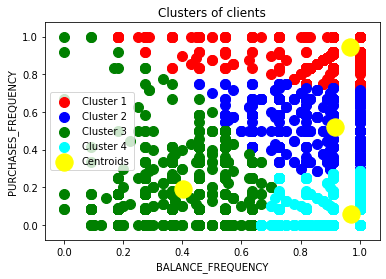

In [8]:
plt.scatter(X[y == 0, 0], X[y == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[y == 1, 0], X[y == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[y == 2, 0], X[y == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[y == 3, 0], X[y == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('lusters of clients')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
plt.show()

In [9]:
y=pd.DataFrame(y)
dataset['cluster'] = y 

In [10]:
dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,NaN
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,NaN


In [11]:
#y=pd.DataFrame(y)
#y.rename(columns={0:'cluster'}, inplace=True)
#y.head(20)

In [12]:
classe_1 = dataset[dataset.cluster == 0]
classe_2 = dataset[dataset.cluster == 1]
classe_3 = dataset[dataset.cluster == 2]
classe_4 = dataset[dataset.cluster == 3]

In [13]:
dataset['cluster'].value_counts()

0.0    3196
3.0    2686
1.0    1514
2.0     943
Name: cluster, dtype: int64

In [14]:
dataset['cluster'].value_counts(normalize=True)

0.0    0.383259
3.0    0.322101
1.0    0.181557
2.0    0.113083
Name: cluster, dtype: float64

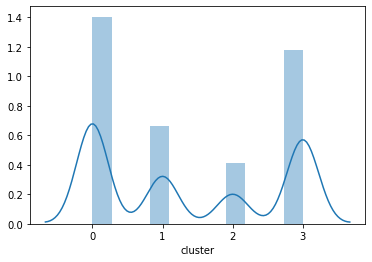

In [15]:
sns.distplot(dataset['cluster'])

In [16]:
#Description Classe 1

#Abscisse
maskAbs1 = dataset.BALANCE_FREQUENCY >0.2 
maskAbs2 = dataset.BALANCE_FREQUENCY <=1
mask1 = maskAbs1 & maskAbs2

#Ordonnée
maskOrd1 = dataset.PURCHASES_FREQUENCY >0.66
maskOrd2 = dataset.PURCHASES_FREQUENCY <=1
mask2 = maskOrd1 & maskOrd2

mask = mask1 & mask2

classe1=dataset[mask]
classe1.head(50)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0.0
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1.0
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12,3.0
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,0.0
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,3.0
18,C10019,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,13000.0,1720.837373,744.613395,0.000000,12,0.0
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12,1.0
20,C10021,2016.684686,1.000000,176.68,0.00,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.000000,12,0.0


In [17]:
mask = classe_1.PURCHASES_FREQUENCY >=0.50
classe_1[mask]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.000000,12,0.0
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.250000,12,0.0
18,C10019,1989.072228,1.000000,504.35,166.00,338.35,0.0,0.666667,0.083333,0.583333,0.0,0,9,13000.0,1720.837373,744.613395,0.000000,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,C18854,6.747965,0.545455,277.44,0.00,277.44,0.0,1.000000,0.000000,1.000000,0.0,0,12,1000.0,263.591465,82.527965,0.363636,12,0.0
8624,C18858,1012.089680,1.000000,312.48,0.00,312.48,0.0,1.000000,0.000000,1.000000,0.0,0,12,1000.0,325.606238,607.957480,0.000000,12,0.0
8629,C18863,115.611030,1.000000,379.32,0.00,379.32,0.0,1.000000,0.000000,1.000000,0.0,0,12,1000.0,281.152056,179.901711,0.000000,12,0.0
8630,C18864,221.291290,1.000000,1429.54,653.82,775.72,0.0,0.916667,0.500000,0.666667,0.0,0,24,700.0,1277.898622,149.825296,0.375000,12,0.0


In [22]:
a = classe_1[mask]
b = classe_1[mask]
A = a.PURCHASES_FREQUENCY.value_counts()
B = b.BALANCE_FREQUENCY.value_counts()
print('Frequence des achats effectués (Pour le cas >= 50% )')
print('========================================================================')
print('')  
print(A)
print('----------------------------------------------')
print(' Frequence de la disponibilité de la balance (pour le cas >= 50% )')
print('==================================================================')
print('')
print(B)

Frequence des achats effectués (Pour le cas >= 50% )

1.000000    799
0.916667    152
0.833333    148
0.500000    139
0.583333    125
0.750000    115
0.666667    106
0.909091     11
0.636364      9
0.875000      8
0.700000      6
0.900000      6
0.800000      6
0.714286      6
0.727273      5
0.545455      4
0.857143      4
0.818182      4
0.571429      3
0.555556      2
0.600000      2
0.625000      2
0.888889      1
Name: PURCHASES_FREQUENCY, dtype: int64
----------------------------------------------
 Frequence de la disponibilité de la balance (pour le cas >= 50% )

1.000000    1304
0.909091      89
0.818182      65
0.636364      43
0.727273      40
0.545455      35
0.454545      14
0.875000      13
0.900000       9
0.833333       7
0.181818       6
0.857143       5
0.800000       5
0.363636       4
0.272727       4
0.500000       3
0.888889       2
0.600000       2
0.777778       2
0.700000       1
0.285714       1
0.428571       1
0.714286       1
0.300000       1
0.571429       

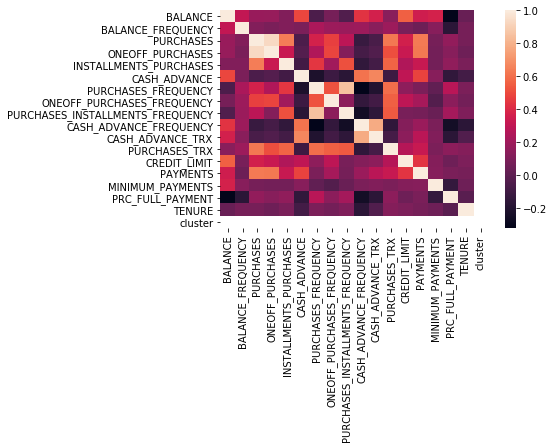

In [282]:
sns.heatmap(classe_1.corr())

In [23]:
classe_2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1.0
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12,1.0
17,C10018,41.089489,0.454545,519.00,0.00,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.250000,12,1.0
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,C18841,4.390888,0.272727,0.00,0.00,0.00,19.351230,0.000000,0.000000,0.000000,0.083333,1,0,500.0,95.983734,112.023710,0.000000,12,1.0
8609,C18843,398.453246,1.000000,0.00,0.00,0.00,647.778706,0.000000,0.000000,0.000000,0.857143,10,0,500.0,323.875395,110.678562,0.000000,7,1.0
8623,C18857,70.954998,0.818182,616.67,0.00,616.67,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,500.0,688.541249,653.219376,0.000000,12,1.0
8627,C18861,342.361553,1.000000,258.50,83.48,175.02,225.819508,0.666667,0.166667,0.500000,0.083333,3,10,1000.0,686.449219,282.368125,0.083333,12,1.0


In [53]:
#Abscisse
maskAbs1 = dataset.BALANCE_FREQUENCY >0.425 
maskAbs2 = dataset.BALANCE_FREQUENCY <=1
mask1 = maskAbs1 & maskAbs2

#Ordonnée
maskOrd1 = dataset.PURCHASES_FREQUENCY >0.225
maskOrd2 = dataset.PURCHASES_FREQUENCY <=0.65
mask2 = maskOrd1 & maskOrd2

mask = mask1 & mask2

dataset[mask]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,2.0
11,C10012,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.000000,12,0.0
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3.0
17,C10018,41.089489,0.454545,519.00,0.00,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.250000,12,1.0
29,C10030,22.063490,1.000000,100.00,0.00,100.00,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,6900.0,160.767773,159.684442,0.000000,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,C18836,997.496745,1.000000,1629.83,1629.83,0.00,276.760257,0.583333,0.583333,0.000000,0.250000,5,21,1200.0,890.611754,590.889201,0.000000,12,2.0
8610,C18844,469.319087,0.818182,383.81,0.00,383.81,870.533909,0.583333,0.000000,0.500000,0.333333,6,14,1500.0,57.924613,335.598994,0.000000,12,3.0
8621,C18855,13.441990,0.454545,56.51,0.00,56.51,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,1000.0,190.431651,153.286406,0.166667,12,0.0
8623,C18857,70.954998,0.818182,616.67,0.00,616.67,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,500.0,688.541249,653.219376,0.000000,12,1.0


In [25]:
mask = classe_2.PURCHASES_FREQUENCY >=0.50
classe_2[mask]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1.0
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12,1.0
27,C10028,125.694817,1.000000,233.28,0.00,233.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,207.773715,164.748819,0.000000,12,1.0
28,C10029,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,1.0
48,C10050,229.867179,1.000000,2390.60,1402.93,987.67,0.000000,1.000000,0.666667,1.000000,0.000000,0,87,3300.0,2543.953559,175.657825,0.916667,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,C18810,9.630478,1.000000,257.49,0.00,257.49,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,1500.0,251.907165,114.027084,0.700000,12,1.0
8589,C18823,1283.337407,1.000000,1022.41,171.60,850.81,1158.035224,0.875000,0.125000,0.750000,0.250000,5,16,1200.0,846.998942,1838.410150,0.000000,8,1.0
8591,C18825,896.563274,0.818182,511.00,0.00,511.00,1084.460175,0.500000,0.000000,0.416667,0.166667,3,6,1400.0,1330.671080,313.807299,0.000000,12,1.0
8623,C18857,70.954998,0.818182,616.67,0.00,616.67,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,500.0,688.541249,653.219376,0.000000,12,1.0


In [26]:
a = classe_2[mask]
b = classe_2[mask]
A = a.PURCHASES_FREQUENCY.value_counts()
B = b.BALANCE_FREQUENCY.value_counts()
print('Frequence des achats effectués (Pour le cas >= 50% )')
print('========================================================================')
print('')  
print(A)
print('----------------------------------------------')
print(' Frequence de la disponibilité de la balance (pour le cas >= 50% )')
print('==================================================================')
print('')
print(B)

Frequence des achats effectués (Pour le cas >= 50% )

1.000000    405
0.833333     76
0.500000     72
0.916667     68
0.666667     59
0.750000     57
0.583333     54
0.888889      7
0.857143      6
0.875000      5
0.625000      3
0.909091      3
0.900000      3
0.545455      3
0.600000      2
0.571429      1
0.700000      1
0.555556      1
0.714286      1
0.636364      1
0.727273      1
Name: PURCHASES_FREQUENCY, dtype: int64
----------------------------------------------
 Frequence de la disponibilité de la balance (pour le cas >= 50% )

1.000000    641
0.909091     42
0.818182     29
0.727273     22
0.636364     20
0.545455     17
0.454545      7
0.888889      6
0.272727      5
0.875000      5
0.833333      4
0.857143      4
0.900000      3
0.666667      3
0.363636      3
0.800000      3
0.750000      2
0.250000      2
0.500000      1
0.625000      1
0.000000      1
0.777778      1
0.444444      1
0.700000      1
0.285714      1
0.571429      1
0.714286      1
0.181818      1
0.60000

In [34]:
classe_2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4,C10005,817.714335,1.000000,16.00,16.0,0.00,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,1.0
7,C10008,1823.652743,1.000000,436.20,0.0,436.20,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12,1.0
14,C10015,2772.772734,1.000000,0.00,0.0,0.00,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12,1.0
17,C10018,41.089489,0.454545,519.00,0.0,519.00,0.00000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.25,12,1.0
19,C10020,3577.970933,1.000000,398.64,0.0,398.64,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.00,12,1.0


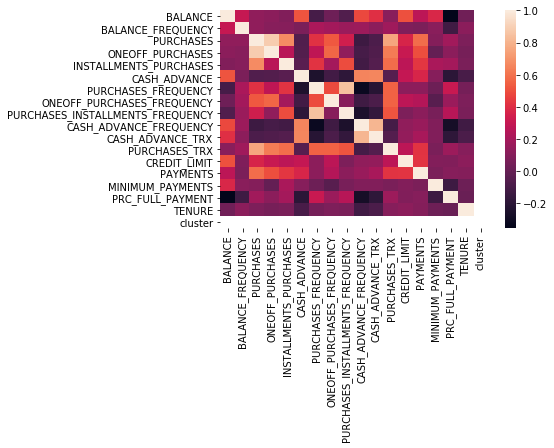

In [305]:
sns.heatmap(classe_2.corr())

In [306]:
classe_3

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12,2.0
16,C10017,2072.074354,0.875000,0.00,0.00,0.00,2784.274703,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,391.974562,376.579631,0.0,8,2.0
38,C10039,6269.418144,1.000000,204.00,204.00,0.00,2925.699862,0.083333,0.083333,0.000000,0.333333,12,2,9000.0,1237.111661,2049.408839,0.0,12,2.0
44,C10046,5315.945594,1.000000,1525.44,469.80,1055.64,0.000000,1.000000,0.333333,1.000000,0.000000,0,20,8500.0,1430.341501,1318.714920,0.0,12,2.0
74,C10078,532.334517,0.909091,791.94,516.64,275.30,0.000000,0.272727,0.090909,0.181818,0.000000,0,7,6000.0,1305.177304,175.510344,0.0,11,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,C18836,997.496745,1.000000,1629.83,1629.83,0.00,276.760257,0.583333,0.583333,0.000000,0.250000,5,21,1200.0,890.611754,590.889201,0.0,12,2.0
8605,C18839,2.892853,0.181818,52.68,0.00,52.68,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,500.0,290.072441,124.724211,1.0,12,2.0
8614,C18848,1182.080141,1.000000,266.68,0.00,266.68,848.848179,0.666667,0.000000,0.666667,0.083333,6,8,1000.0,119.861878,8607.234543,0.0,12,2.0
8626,C18860,1528.122917,1.000000,0.00,0.00,0.00,2426.656054,0.000000,0.000000,0.000000,0.500000,19,0,3500.0,2039.574349,314.465218,0.0,12,2.0


In [27]:
mask = classe_3.PURCHASES_FREQUENCY >=0.50
classe_3[mask]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
44,C10046,5315.945594,1.0,1525.44,469.80,1055.64,0.000000,1.000000,0.333333,1.000000,0.000000,0,20,8500.0,1430.341501,1318.714920,0.0,12,2.0
76,C10080,1727.638449,1.0,606.11,606.11,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,17,11000.0,2959.920544,623.656993,0.0,12,2.0
137,C10143,706.132889,1.0,897.86,714.52,183.34,586.268966,0.916667,0.333333,0.916667,0.250000,3,18,1200.0,972.358048,184.524376,0.0,12,2.0
153,C10159,13673.079610,1.0,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.0,12,2.0
168,C10174,1128.124563,1.0,924.60,0.00,924.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,1202.711782,1747.037345,0.0,12,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,C18807,52.666422,1.0,150.30,0.00,150.30,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,54.722514,82.955180,0.0,6,2.0
8590,C18824,1843.191023,1.0,1446.48,0.00,1446.48,1450.172456,1.000000,0.000000,1.000000,0.083333,1,48,2000.0,945.679390,921.657393,0.0,12,2.0
8602,C18836,997.496745,1.0,1629.83,1629.83,0.00,276.760257,0.583333,0.583333,0.000000,0.250000,5,21,1200.0,890.611754,590.889201,0.0,12,2.0
8614,C18848,1182.080141,1.0,266.68,0.00,266.68,848.848179,0.666667,0.000000,0.666667,0.083333,6,8,1000.0,119.861878,8607.234543,0.0,12,2.0


In [28]:
a = classe_3[mask]
b = classe_3[mask]
A = a.PURCHASES_FREQUENCY.value_counts()
B = b.BALANCE_FREQUENCY.value_counts()
print('Frequence des achats effectués (Pour le cas >= 50% )')
print('========================================================================')
print('')  
print(A)
print('----------------------------------------------')
print(' Frequence de la disponibilité de la balance (pour le cas >= 50% )')
print('==================================================================')
print('')
print(B)

Frequence des achats effectués (Pour le cas >= 50% )

1.000000    222
0.500000     50
0.666667     41
0.916667     38
0.583333     33
0.833333     31
0.750000     25
0.900000      5
0.818182      5
0.875000      3
0.571429      3
0.888889      2
0.909091      2
0.700000      1
0.800000      1
0.600000      1
0.636364      1
0.545455      1
0.727273      1
Name: PURCHASES_FREQUENCY, dtype: int64
----------------------------------------------
 Frequence de la disponibilité de la balance (pour le cas >= 50% )

1.000000    369
0.909091     22
0.636364     14
0.818182     12
0.545455     10
0.727273      7
0.454545      7
0.833333      5
0.900000      3
0.888889      2
0.875000      2
0.857143      2
0.666667      2
0.181818      2
0.800000      1
0.700000      1
0.363636      1
0.272727      1
0.500000      1
0.750000      1
0.000000      1
Name: BALANCE_FREQUENCY, dtype: int64


In [308]:
classe_4

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12,3.0
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,3.0
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,C18835,112.390812,1.000000,269.90,49.90,220.00,0.000000,0.666667,0.083333,0.666667,0.000000,0,9,1500.0,204.160043,167.150382,0.000000,12,3.0
8608,C18842,21.739563,0.727273,255.60,0.00,255.60,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1500.0,400.463395,137.193939,0.750000,12,3.0
8610,C18844,469.319087,0.818182,383.81,0.00,383.81,870.533909,0.583333,0.000000,0.500000,0.333333,6,14,1500.0,57.924613,335.598994,0.000000,12,3.0
8625,C18859,1107.848228,1.000000,0.00,0.00,0.00,318.884066,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,400.316615,294.743006,0.000000,12,3.0


In [29]:
mask = classe_4.PURCHASES_FREQUENCY >=0.50
classe_4[mask]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12,3.0
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,3.0
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3.0
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3.0
25,C10026,169.781679,1.000000,399.60,0.00,399.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,3000.0,215.306142,163.005536,0.000000,12,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,C18805,34.223151,1.000000,108.00,0.00,108.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,68.331764,167.726633,0.000000,12,3.0
8600,C18834,20.996733,0.909091,295.92,0.00,295.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,276.213902,160.911617,0.636364,12,3.0
8601,C18835,112.390812,1.000000,269.90,49.90,220.00,0.000000,0.666667,0.083333,0.666667,0.000000,0,9,1500.0,204.160043,167.150382,0.000000,12,3.0
8608,C18842,21.739563,0.727273,255.60,0.00,255.60,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1500.0,400.463395,137.193939,0.750000,12,3.0


In [30]:
a = classe_4[mask]
b = classe_4[mask]
A = a.PURCHASES_FREQUENCY.value_counts()
B = b.BALANCE_FREQUENCY.value_counts()
print('Frequence des achats effectués (Pour le cas >= 50% )')
print('========================================================================')
print('')  
print(A)
print('----------------------------------------------')
print(' Frequence de la disponibilité de la balance (pour le cas >= 50% )')
print('==================================================================')
print('')
print(B)

Frequence des achats effectués (Pour le cas >= 50% )

1.000000    612
0.916667    127
0.500000    122
0.833333     96
0.583333     96
0.666667     93
0.750000     91
0.909091      9
0.545455      9
0.818182      9
0.857143      9
0.727273      7
0.636364      6
0.900000      6
0.875000      6
0.600000      4
0.777778      4
0.571429      4
0.888889      3
0.714286      3
0.700000      2
0.800000      2
0.555556      1
0.625000      1
Name: PURCHASES_FREQUENCY, dtype: int64
----------------------------------------------
 Frequence de la disponibilité de la balance (pour le cas >= 50% )

1.000000    1035
0.909091      75
0.818182      54
0.727273      38
0.636364      27
0.545455      21
0.857143       9
0.454545       7
0.777778       6
0.900000       6
0.888889       6
0.500000       5
0.363636       4
0.666667       4
0.833333       4
0.800000       4
0.181818       3
0.875000       3
0.750000       3
0.272727       3
0.428571       1
0.714286       1
0.571429       1
0.000000       1

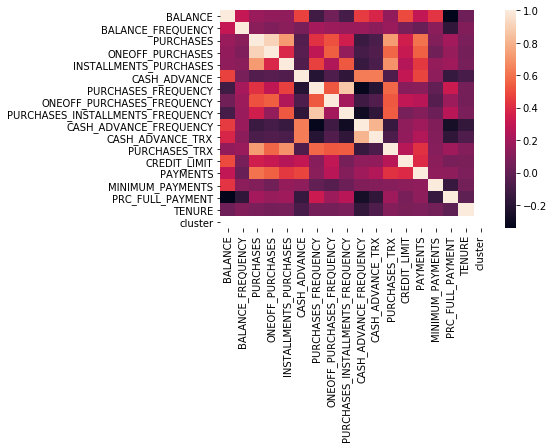

In [309]:
sns.heatmap(classe_4.corr())

In [353]:
y=pd.DataFrame(y)
data=pd.concat((dataset_1,y),axis=1)
y.rename(columns={0:'y'}, inplace=True)
data=data.dropna()
data.target

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,Target
0,0.818182,0.166667,3
1,0.909091,0.000000,3
2,1.000000,1.000000,0
4,1.000000,0.083333,1
5,1.000000,0.666667,0
...,...,...,...
8631,1.000000,1.000000,2
8632,0.636364,0.500000,0
8633,1.000000,0.166667,0
8634,1.000000,0.083333,3


In [369]:
data
classe1 = data[data.Target == 0]
classe1.describe()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,Target
count,3196.000000,3196.000000,3196.0
mean,0.894849,0.501763,0.0
std,0.209104,0.400885,0.0
min,0.090909,0.000000,0.0
25%,0.909091,0.083333,0.0
50%,1.000000,0.500000,0.0
75%,1.000000,0.937500,0.0
max,1.000000,1.000000,0.0


In [370]:
data
classe2 = data[data.Target == 1]
classe2.describe()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,Target
count,1514.000000,1514.000000,1514.0
mean,0.898354,0.524714,1.0
std,0.203136,0.399363,0.0
min,0.000000,0.000000,1.0
25%,0.909091,0.083333,1.0
50%,1.000000,0.522728,1.0
75%,1.000000,1.000000,1.0
max,1.000000,1.000000,1.0


In [372]:
data
classe3 = data[data.Target == 2]
classe3.describe()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,Target
count,943.000000,943.000000,943.0
mean,0.889953,0.474935,2.0
std,0.214476,0.400204,0.0
min,0.000000,0.000000,2.0
25%,0.909091,0.083333,2.0
50%,1.000000,0.416667,2.0
75%,1.000000,0.916667,2.0
max,1.000000,1.000000,2.0


In [371]:
data
classe4 = data[data.Target == 3]
classe4.describe()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,Target
count,2686.000000,2686.000000,2686.0
mean,0.903556,0.474491,3.0
std,0.200428,0.400290,0.0
min,0.000000,0.000000,3.0
25%,0.909091,0.083333,3.0
50%,1.000000,0.416667,3.0
75%,1.000000,0.916667,3.0
max,1.000000,1.000000,3.0


In [87]:
pd.crosstab(dataset['Cluster'], dataset['CUST_ID'])

CUST_ID,C10001,C10002,C10003,C10005,C10006,C10007,C10008,C10009,C10010,C10011,...,C19179,C19180,C19181,C19182,C19183,C19184,C19186,C19188,C19189,C19190
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,1,1,0,0,1,...,0,0,1,1,1,0,1,1,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [398]:
dataset

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,cluster
0,0.818182,0.166667,3
1,0.909091,0.000000,3
2,1.000000,1.000000,0
4,1.000000,0.083333,1
5,1.000000,0.666667,0
...,...,...,...
8631,1.000000,1.000000,2
8632,0.636364,0.500000,0
8633,1.000000,0.166667,0
8634,1.000000,0.083333,3


In [429]:
def imputation(dataset):
    return dataset.dropna(axis=0)

def pretraitement(dataset):
    
    dataset = imputation(dataset)
    
    X = dataset.drop('cluster', axis=1)
    y = dataset['cluster']
    
    print(y.value_counts())
    return X,y

In [430]:
pretraitement(dataset)

0.0    3196
3.0    2686
1.0    1514
2.0     943
Name: cluster, dtype: int64


(     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0     C10001    40.900749           0.818182      95.40              0.00   
 1     C10002  3202.467416           0.909091       0.00              0.00   
 2     C10003  2495.148862           1.000000     773.17            773.17   
 4     C10005   817.714335           1.000000      16.00             16.00   
 5     C10006  1809.828751           1.000000    1333.28              0.00   
 ...      ...          ...                ...        ...               ...   
 8631  C18865   553.901465           1.000000     458.76              0.00   
 8632  C18866    70.162707           0.636364     599.00              0.00   
 8633  C18867   942.329974           1.000000     450.00            450.00   
 8634  C18868   683.188651           1.000000      85.00             85.00   
 8635  C18869     4.107485           0.181818      52.50              0.00   
 
       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUEN

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [432]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [434]:
model_1 = DecisionTreeClassifier(random_state=0)
model_2 = KNeighborsClassifier(n_neighbors=2)
model_3 = SVC(random_state=0)
 
    
model = VotingClassifier([('Tree', model_1), ('KNN',model_2), ('SVM', model_3)],voting = 'hard')

for model in (model_1, model_2, model_3, model) : 
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test,y_test))
    
confusion_matrix(y_test, model.predict(X_test))

DecisionTreeClassifier 1.0


C:\Users\CAREL KONGA\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier 0.9994212962962963


C:\Users\CAREL KONGA\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.9942129629629629


C:\Users\CAREL KONGA\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CAREL KONGA\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 1.0


array([[641,   0,   0,   0],
       [  0, 318,   0,   0],
       [  0,   0, 187,   0],
       [  0,   0,   0, 582]], dtype=int64)